
> #### Importing necessary libraries:
>
> - Datetime
> - pandas
> - numpy
> - pandas
> - seaborn
> - matplotlib.pyplot
> - Math

In [791]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os
import calendar
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [792]:
# Importing the dataset
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data mapping
========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [793]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [794]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [795]:
# renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [796]:
# Copying the dataframe into new

bike = df.copy()

In [797]:
# checking the shape of new dataframe

bike.shape

(730, 16)

In [798]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [799]:
# Encoding/mapping the season column

bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [800]:
# Encoding/mapping the month column

bike['month'] = bike['month'].apply(lambda x: calendar.month_abbr[x])

In [801]:
mapping = {
    0:'Sunday',
    1:'Monday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',
    6:'Saturday'
}
bike['weekday'] = bike['weekday'].map(mapping)

In [802]:
# Encoding/mapping the weathersit column

bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [803]:
# check the head of the dataset

bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [804]:
# check the column info of the dataset

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB



> #### Visualize dataset
>
> - Boxplot and histogram for 'count' column.
> - Scatter the numeric columns with 'count' column
> - Boxplot the categorical columns with 'count' column.
> - Correlation between each features.

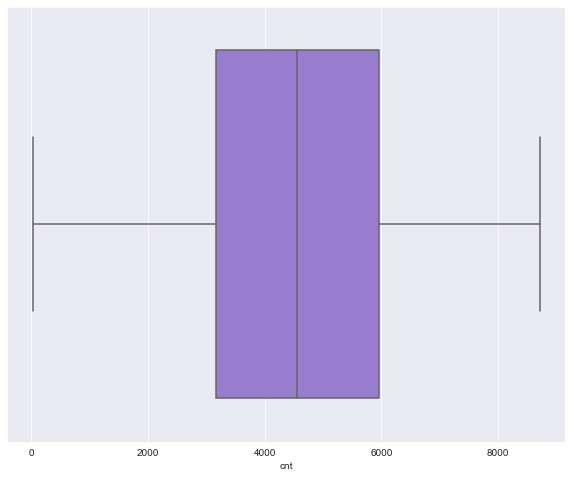

In [805]:
# Boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x='cnt',data=bike, color='mediumpurple')
plt.show()

From the boxplot of count column, it is clearly visible that most of the data lies between 3000 to 6000. There are no outliners

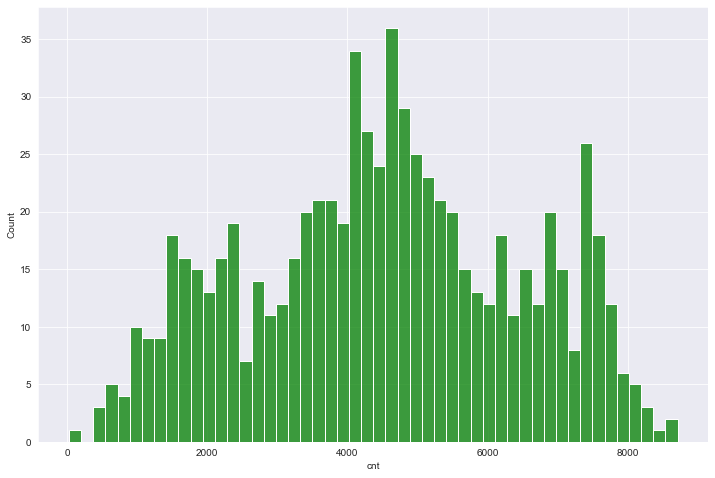

In [806]:
#Histogram of count 
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.histplot(bike['cnt'], bins =50, color='green')
plt.show()

In [807]:
# describe cnt
bike.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#### Insights
> Looking at mean we will deduce which variables are important for Linear regression.

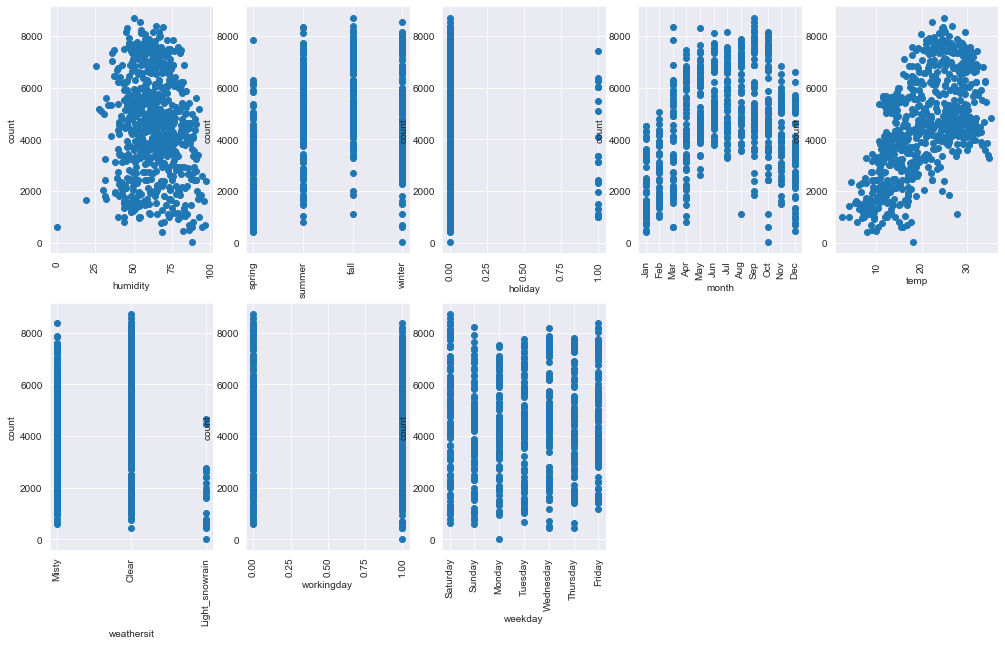

In [808]:
# Scatter plot
# create a pair plot

fields = ['humidity','season','holiday','month','temp','weathersit','workingday',  'weekday']

fig = plt.figure(figsize=(17,10))

for i,f in enumerate(fields):
    ax = fig.add_subplot(2,5,i+1)
    ax.scatter(bike[f],bike['cnt'])
    ax.set_ylabel('count')
    ax.set_xlabel(f)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

plt.show()

> Insight
> - We can clearly see that Light snow rain have lower number of bike booking
> - Holiday data is biased and can be removed
> - Humidity data cannot be a predictor.

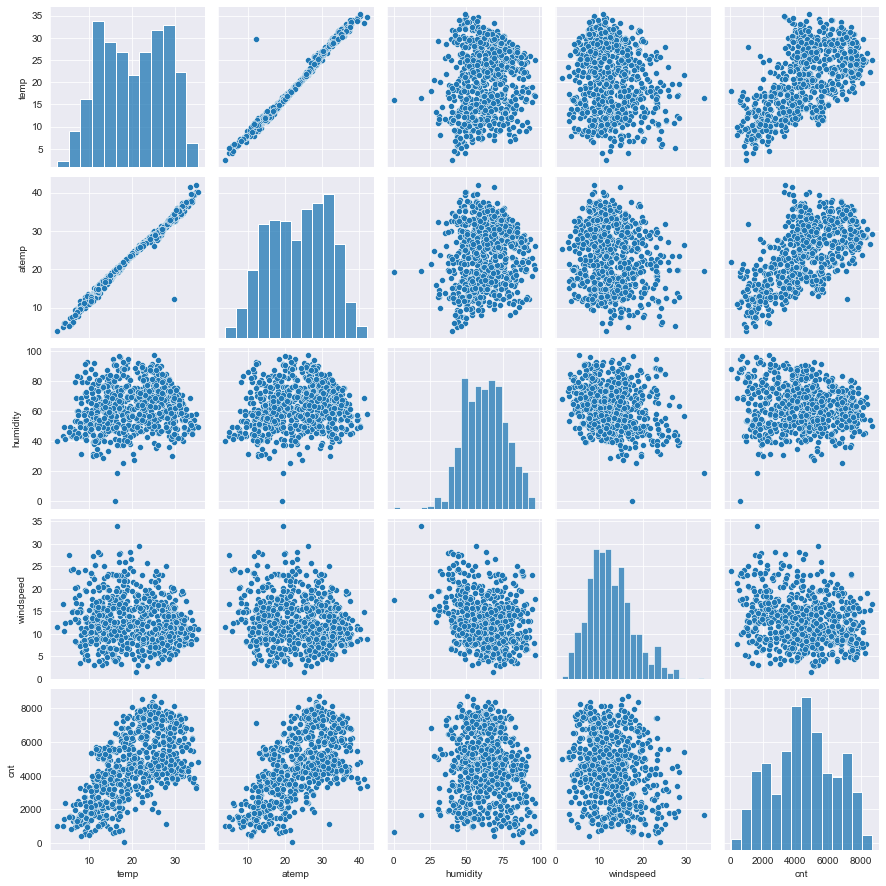

In [809]:
fields_pair_plot = ['temp','atemp','humidity','windspeed','cnt']
sns.pairplot(df[fields_pair_plot])
plt.show()

Insights
> The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

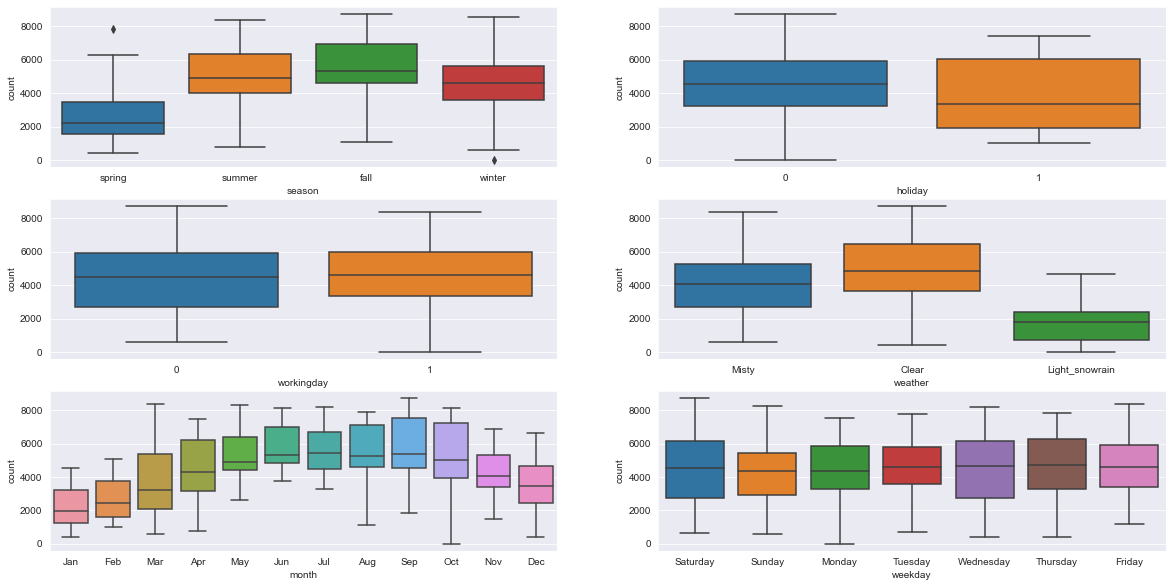

In [810]:
# Boxplot between count & each category
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(20,10)

sns.boxplot(data=bike, y='cnt', x ='season',ax=axes[0][0])
sns.boxplot(data=bike, y='cnt', x ='holiday',ax=axes[0][1])
sns.boxplot(data=bike, y='cnt', x ='workingday',ax=axes[1][0])
sns.boxplot(data=bike, y='cnt', x ='weathersit',ax=axes[1][1])
sns.boxplot(data=bike, y='cnt', x ='month',ax=axes[2][0])
sns.boxplot(data=bike, y='cnt', x ='weekday',ax=axes[2][1])

axes[0][0].set(xlabel='season', ylabel ='count')
axes[0][1].set(xlabel='holiday', ylabel ='count')
axes[1][0].set(xlabel='workingday', ylabel ='count')
axes[1][1].set(xlabel='weather', ylabel ='count')
axes[2][0].set(xlabel='month', ylabel ='count')
axes[2][1].set(xlabel='weekday', ylabel ='count')
plt.show()

Insights
> There were 6 categorical variables in the dataset.

> We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

> The inference that We could derive were:

> - season: Most of the bike booking were happening in fall season with a median of over 5000 booking (for the period of 2 years). This was followed by summer & winter. This indicates, season can be a good predictor for the dependent variable.
> - mnth: Based on mean 10% of the bike booking were happening in the months May, Jun, July, August, September & Octber with a median of over 4000 booking per month. This indicates, months has some trend for bookings and can be a good predictor for the dependent variable.
> - weathersit: Almost 46% of the bike booking were happening during ‘clear weather with a median of close to 5000 booking (for the period of 2 years). This was followed by Misty with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
> - holiday: Almost 98% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.
> - weekday: weekday variable shows very close trend having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
> - workingday: Almost all of the bike booking were same for working and non working days. This indicates, workingday will not be a good predictor for the dependent variable

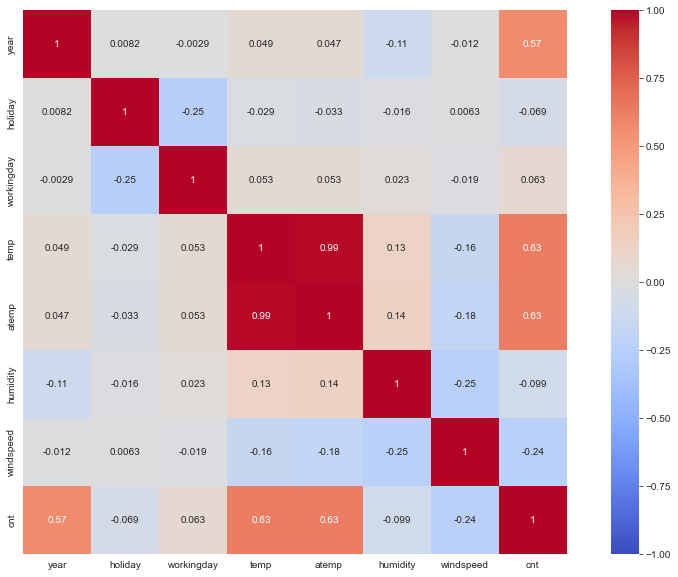

In [811]:
# Correlation between each feature
plt.figure(figsize=(16,10))
sns.heatmap(bike.corr('pearson'), vmin = -1, vmax=1,cmap = 'coolwarm',annot=True,square=True)
plt.show()

Insights:
> - The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
> - We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

###  Data Preparation

In [812]:
# Dummy variable creation for month, weekday, weathersit and season variables

df_months = pd.get_dummies(bike.month,drop_first = True)
df_weekdays = pd.get_dummies(bike.weekday, drop_first = True)
df_weathersit = pd.get_dummies(bike.weathersit, drop_first = True)
df_seasons = pd.get_dummies(bike.season, drop_first = True)

In [813]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [814]:
# Merfing the data frame, with the dummy variable dataset

bike_new = pd.concat([bike, df_months, df_weekdays, df_weathersit, df_seasons], axis =1)

In [815]:
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Misty,spring,summer,winter
0,spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [816]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  Aug             730 non-null    uint8  
 13  Dec             730 non-null    uint8  
 14  Feb             730 non-null    uint8  
 15  Jan             730 non-null    uint8  
 16  Jul             730 non-null    uint8  
 17  Jun             730 non-null    uin

In [817]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bike_new.drop(['season','month','weekday','weathersit'],axis =1, inplace = True)

In [818]:
# check the head of new dataframe

bike_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [819]:
#check the shape of new dataframe
bike_new.shape

(730, 30)

In [820]:
# check the colum info of new dataframe
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   Aug             730 non-null    uint8  
 9   Dec             730 non-null    uint8  
 10  Feb             730 non-null    uint8  
 11  Jan             730 non-null    uint8  
 12  Jul             730 non-null    uint8  
 13  Jun             730 non-null    uint8  
 14  Mar             730 non-null    uint8  
 15  May             730 non-null    uint8  
 16  Nov             730 non-null    uint8  
 17  Oct             730 non-null    uin

###  Splitting the Data into Training and Testing Sets

> - Split data.
> - MinMax scaling the numberic columns.

In [821]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [822]:
# splitting the dataframe into Train and Test
np.random.seed(0)
df_train, df_test = train_test_split(bike_new,train_size=0.7, random_state=100)

In [823]:
# check the shape of training datatset
df_train.shape

(510, 30)

In [824]:
# check the shape of testing dataset

df_test.shape

(220, 30)

In [825]:
# Using MinMaxScaler()

scaler = MinMaxScaler()

In [826]:
# Verifying the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [827]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_variables = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_variables] = scaler.fit_transform(df_train[num_variables])

In [828]:
# Verifying the head after applying scaling

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [829]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

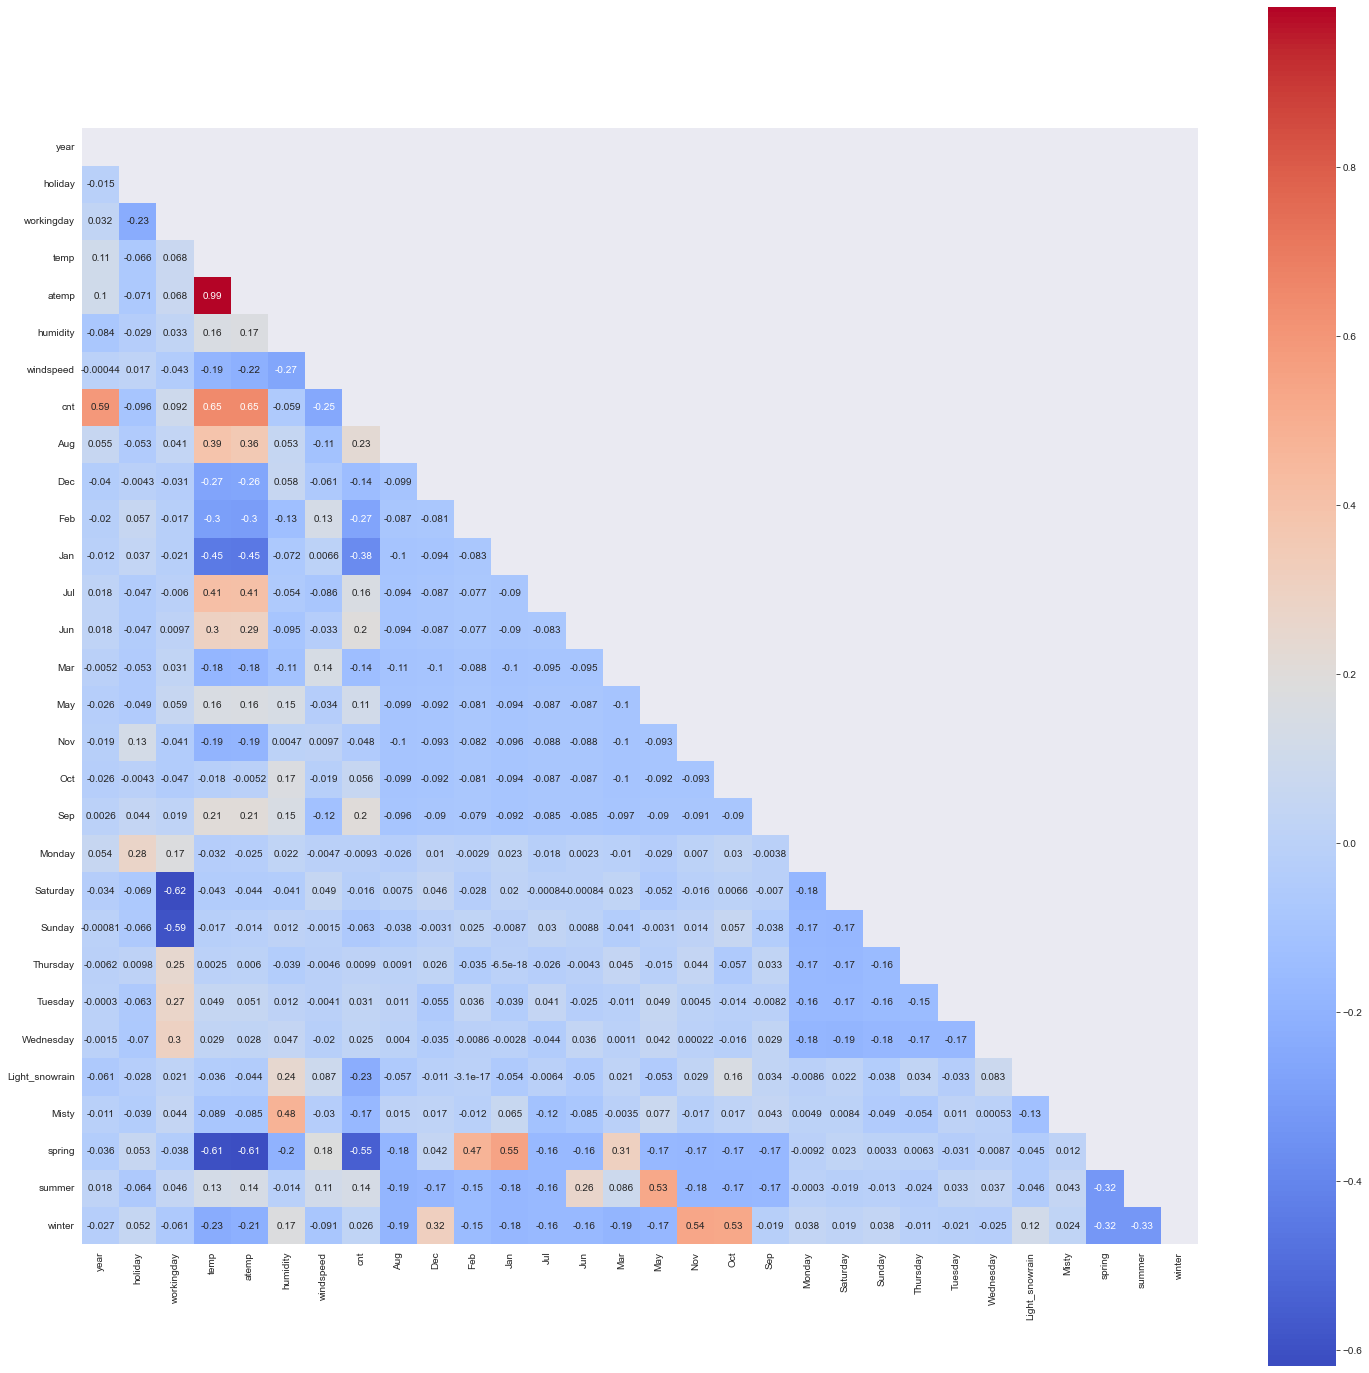

In [830]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap ='coolwarm', mask=matrix, square = True)

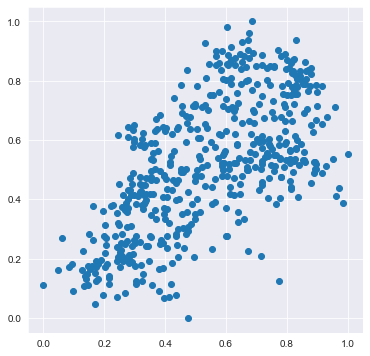

In [831]:
# Visualizing one of the correlation to see the trends via scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### BUILDING A LINEAR MODEL

In [832]:
# Building the Linear Model

y_train = df_train.pop('cnt')
x_train = df_train

In [833]:
# Recursive feature elimination

lm= LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(x_train, y_train)

In [834]:
# List of variables selected in top 15 list
list(zip(x_train.columns, rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 12),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 11),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 10),
 ('Tuesday', False, 7),
 ('Wednesday', False, 13),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 15),
 ('winter', True, 1)]

In [835]:
# Selecting the selected variable via RFE in col list

col = x_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'Jul', 'Sep', 'Saturday', 'Sunday', 'Light_snowrain',
       'Misty', 'spring', 'winter'],
      dtype='object')


In [836]:
# function to calculate VIF of vaiables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [837]:
# Dataframe with RFE selected variables

x_train_rfe = x_train[col]

In [838]:
# Calculate VIF

calculateVIF(x_train_rfe)

,Features,VIF
3,temp,52.82
4,atemp,51.48
2,workingday,40.81
9,Saturday,9.96
10,Sunday,9.67
13,spring,2.55
1,holiday,2.54
5,humidity,1.90
14,winter,1.79
12,Misty,1.57


temp and atemp shows high VIF value

###  Building Linear Model using 'STATS MODEL'

In [839]:
# Building lst linear regression model

X_train_lm_first = sm.add_constant(x_train_rfe)
lr_first = sm.OLS(y_train, X_train_lm_first).fit()
print(lr_first.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          8.89e-189
Time:                        09:21:10   Log-Likelihood:                 511.35
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     495   BIC:                            -929.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2422      0.025      9.

In [840]:
# We can drop atemp variable as it has high P value and VIF and highling coleratted to temp
X_train_new = x_train_rfe.drop(['atemp'], axis=1)

In [841]:
# Calculate VIF

calculateVIF(X_train_new)

,Features,VIF
2,workingday,40.65
8,Saturday,9.92
9,Sunday,9.64
3,temp,2.99
12,spring,2.55
1,holiday,2.54
4,humidity,1.89
13,winter,1.78
11,Misty,1.57
6,Jul,1.30


In [842]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          9.38e-190
Time:                        09:21:14   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2435      0.025      9.

In [843]:
# We can drop workingday variable as it has high P value
X_train_new = X_train_new.drop(['workingday'], axis=1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,22.65
2,temp,15.31
4,windspeed,4.06
11,spring,2.55
10,Misty,2.25
12,winter,2.10
0,year,2.06
5,Jul,1.40
7,Saturday,1.23
8,Sunday,1.23


In [844]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          9.38e-190
Time:                        09:21:16   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3383      0.031     10.

In [845]:
# We can drop Saturday variable as it has high P value
X_train_new = X_train_new.drop(['Saturday'], axis=1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,22.63
2,temp,15.29
4,windspeed,4.02
10,spring,2.54
9,Misty,2.25
11,winter,2.09
0,year,2.06
5,Jul,1.40
8,Light_snowrain,1.21
6,Sep,1.20


In [846]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.9
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          8.95e-191
Time:                        09:21:17   Log-Likelihood:                 510.52
No. Observations:                 510   AIC:                            -995.0
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3408      0.031     11.

In [847]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,22.63
2,temp,15.29
4,windspeed,4.02
10,spring,2.54
9,Misty,2.25
11,winter,2.09
0,year,2.06
5,Jul,1.40
8,Light_snowrain,1.21
6,Sep,1.20


In [848]:
# We can drop nov variable humidity as it has high VIF value
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.67
3,windspeed,4.01
0,year,2.06
9,spring,1.66
8,Misty,1.52
10,winter,1.41
4,Jul,1.35
5,Sep,1.20
6,Sunday,1.18
7,Light_snowrain,1.08


In [849]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.32e-188
Time:                        09:21:23   Log-Likelihood:                 502.54
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     498   BIC:                            -930.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2608      0.024     11.

In [850]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.67
3,windspeed,4.01
0,year,2.06
9,spring,1.66
8,Misty,1.52
10,winter,1.41
4,Jul,1.35
5,Sep,1.20
6,Sunday,1.18
7,Light_snowrain,1.08


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [851]:
lr_5.params

const             0.260846
year              0.234162
holiday          -0.105667
temp              0.448572
windspeed        -0.139259
Jul              -0.070613
Sep               0.056053
Sunday           -0.047735
Light_snowrain   -0.290717
Misty            -0.081644
spring           -0.111663
winter            0.047099
dtype: float64

### Insights
> This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

### Final Model Interpretation

#### Hypothesis Testing:

Hypothesis testing states that:

> - H0:B1=B2=...=Bn=0
> -H1: at least one Bi!=0

In [852]:
lr_5.params

const             0.260846
year              0.234162
holiday          -0.105667
temp              0.448572
windspeed        -0.139259
Jul              -0.070613
Sep               0.056053
Sunday           -0.047735
Light_snowrain   -0.290717
Misty            -0.081644
spring           -0.111663
winter            0.047099
dtype: float64

##### Insights
> From the lr_5 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

#### F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

> - F-statistic: 233.6
> - Prob (F-statistic): 1.32e-188.

The F-Statistics value of 233 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

#### The equation of best fitted surface based on model lr5:

cnt = 0.260846 + (yr × 0.234162) + (Sep × 0.056053) + (temp × 0.448572) − (windspeed × 0.139259) + (winter × 0.047099) + (season4 ×0.128744) + (mnth9 × 0.094743) + (weekday6 ×0.056909) − (weathersit2 × 0.074807) − (weathersit3 × 0.306992)

###  Residual Analysis of the train data and validation

In [853]:
X_train_lm_5

,const,year,holiday,temp,windspeed,Jul,Sep,Sunday,Light_snowrain,Misty,spring,winter
576,1.0,1,0,0.815169,0.264686,1,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.663106,0,0,1,0,0,1,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,1,0,0
111,1.0,0,0,0.345824,0.380981,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,1,0
350,1.0,0,0,0.248216,0.431816,0,0,0,0,1,0,1
79,1.0,0,0,0.462664,0.529881,0,0,0,0,1,0,0


In [854]:
y_train_pred = lr_5.predict(X_train_lm_5)

#### Normality of error terms

Text(0.5, 0, 'Errors')

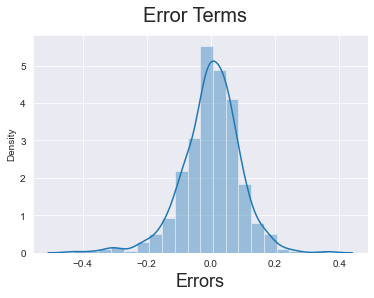

In [855]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#### Insight
> Error terms are following normal distribution

###### Multi Colinearity

In [856]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.67
3,windspeed,4.01
0,year,2.06
9,spring,1.66
8,Misty,1.52
10,winter,1.41
4,Jul,1.35
5,Sep,1.20
6,Sunday,1.18
7,Light_snowrain,1.08


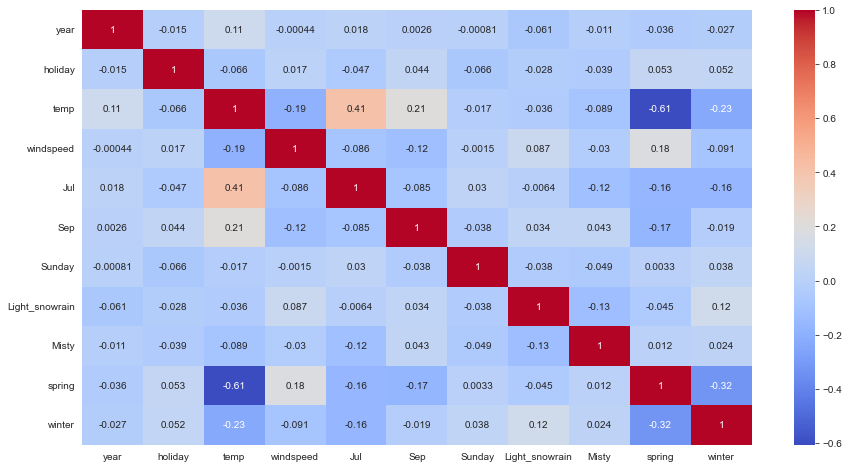

In [857]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="coolwarm")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

#### Linearity


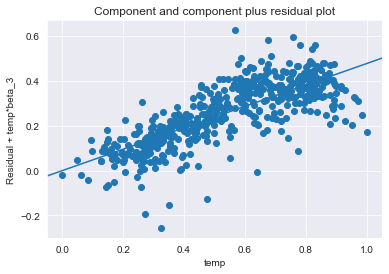

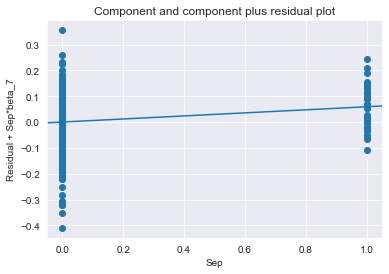

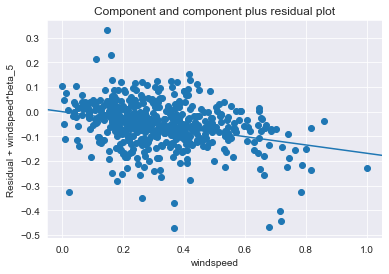

In [858]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_3, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_3, 'Sep')
plt.show()

sm.graphics.plot_ccpr(lr_3, 'windspeed')
plt.show()

#### Insight
> Linearity can be observed from above visualizations.

#### Homoscedasticity

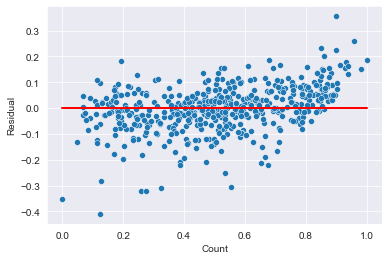

In [859]:
y_train_pred = lr_3.predict(X_train_lm_3)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

###  Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [860]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [861]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [862]:
y_test = df_test.pop('cnt')
X_test = df_test

In [863]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [864]:
y_pred = lr_5.predict(X_test_lm_5)

In [865]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8104

#### Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

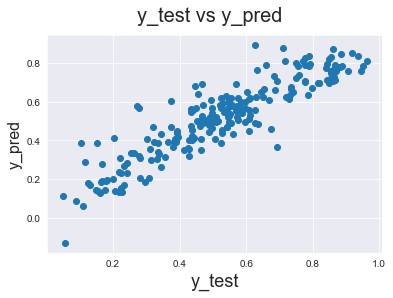

In [866]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [867]:
round(lr_5.params,4)


const             0.2608
year              0.2342
holiday          -0.1057
temp              0.4486
windspeed        -0.1393
Jul              -0.0706
Sep               0.0561
Sunday           -0.0477
Light_snowrain   -0.2907
Misty            -0.0816
spring           -0.1117
winter            0.0471
dtype: float64

#### Insight
> We can see that the equation of our best fitted line is:

> const =0.2608 + (year * 0.2342) - (holiday * 0.1057) + (temp * 0.4486) - (windspeed * 0.1393) - (Jul * 0.0706) + 
(Sep * 0.0561) - (Sunday * 0.0477) - (Light_snowrain * 0.2907) - (Misty * 0.0816) - (spring * 0.1117) + (winter * 0.0471)

In [868]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8004


### FINAL RESULT  COMPARISON

> - Train R^2 :0.838
> - Train Adjusted R^2 :0.834
> - Test R^2 :0.8104
> - Test Adjusted R^2 :0.8004
> - This seems to be a really good model that can very well 'Generalize' various datasets.

### FINAL REPORT

As per our final Model, the top 3 predictor variables that influences the bike booking are:

> - Temperature (temp) - A coefficient value of ‘0.4486’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.4486 units.
> - Weather Situation  (Light_snowrain) - A coefficient value of ‘-0.2907’ indicated that, w.r.t Light snow rain, a unit increase in Light_snowrain variable decreases the bike hire numbers by 0.2907 units.
> - Year (yr) - A coefficient value of ‘0.2341’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2342 units.

So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

> The next best features that can also be considered are

> - Spring season: - A coefficient value of ‘-0.1117’ indicated that w.r.t spring season, a unit increase in spring variable decreases the bike hire numbers by -0.1117 units.
> - windspeed: - A coefficient value of ‘-0.1393’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1393 units.